In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
# 데이터 로드
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_submission.csv')

In [88]:
# 데이터 분할
X_facts = df['facts']
X_first_party = df[['first_party']]
X_second_party = df[['second_party']]
y = df['first_party_winner']


In [89]:
# 데이터 세트 분할
X_facts_train, X_facts_test, X_first_party_train, X_first_party_test, X_second_party_train, X_second_party_test, y_train, y_test = train_test_split(X_facts, X_first_party, X_second_party, y, test_size=0.2, random_state=42)


In [90]:
# TfidfVectorizer 초기화 및 변환
vectorizer = CountVectorizer()
X_facts_train_tfidf = vectorizer.fit_transform(X_facts_train)
X_facts_test_tfidf = vectorizer.transform(X_facts_test)


In [91]:
X_facts_train_tfidf.shape

(1982, 15790)

In [92]:
df

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [93]:
# one-hot 인코딩
encoder = OneHotEncoder(handle_unknown='ignore')
X_first_party_train_encoded = encoder.fit_transform(X_first_party_train)
X_first_party_test_encoded = encoder.transform(X_first_party_test)
X_second_party_train_encoded = encoder.fit_transform(X_second_party_train)
X_second_party_test_encoded = encoder.transform(X_second_party_test)

In [94]:
# 데이터 결합
X_train_combined = hstack([X_facts_train_tfidf, X_first_party_train_encoded, X_second_party_train_encoded])
X_test_combined = hstack([X_facts_test_tfidf, X_first_party_test_encoded, X_second_party_test_encoded])

In [95]:
# 모델 생성 및 학습
clf = MultinomialNB()
clf.fit(X_train_combined, y_train)

MultinomialNB()

In [101]:
# 모델 생성 및 학습
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_combined, y_train)

# 예측 및 성능 평가
y_pred = clf.predict(X_test_combined)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5866935483870968
              precision    recall  f1-score   support

           0       0.39      0.40      0.40       168
           1       0.69      0.68      0.69       328

    accuracy                           0.59       496
   macro avg       0.54      0.54      0.54       496
weighted avg       0.59      0.59      0.59       496



In [99]:
# 학습 데이터 세트에서의 성능
y_train_pred = clf.predict(X_train_combined)
train_accuracy = accuracy_score(y_train, y_train_pred)

# 테스트 데이터 세트에서의 성능
y_test_pred = clf.predict(X_test_combined)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9757820383451059
Test Accuracy: 0.6149193548387096


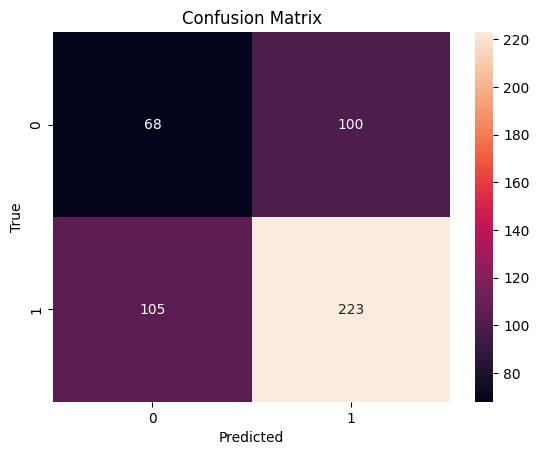

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()